# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>


# Import Statements


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation


In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data


In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data


**Challenge**: Answer these questions about the dataset:

1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?


In [6]:
data.shape

(5391, 6)

In [7]:
data.isnull().sum()


Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [8]:
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)



Number of duplicate rows: 0


In [9]:
data.dtypes

# data.columns


Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [10]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions


**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that _domestic_ in this context refers to the United States.


In [11]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$', '').str.replace(',', '')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', '')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$', '').str.replace(',', '')


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.


In [12]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [13]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [14]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

### Descriptive Statistics


**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?


In [15]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [16]:
mean_budget = pd.to_numeric(data['USD_Production_Budget']).mean()
print(mean_budget)


31113737.57837136


In [17]:
average_gross_revenue = pd.to_numeric(data['USD_Worldwide_Gross']).mean()
print(average_gross_revenue)


88855421.96271564


In [18]:
data['USD_Domestic_Gross'].min()


'0'

In [19]:

data['USD_Worldwide_Gross'].min()

'0'

In [20]:
num_rows = int(len(data) * 0.25)  # Calculate the number of rows to select
last_25_percent_data = data.tail(num_rows)  # Get the last 25 percent of rows


In [21]:
last_25_percent_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4044,3377,2011-11-23,My Week with Marilyn,10000000,34240572,14597405
4045,2731,2011-11-25,The Artist,16000000,128256712,44667095
4046,5368,2011-11-25,The Ridges,17300,0,0
4047,1349,2011-12-08,Final Destination 5,40000000,155011165,42587643
4048,1906,2011-12-08,30 Minutes or Less,28000000,40966716,37053924


In [22]:
last_25_percent_data.loc[:, 'Profitability'] = pd.to_numeric(last_25_percent_data['USD_Production_Budget']) - pd.to_numeric(last_25_percent_data['USD_Worldwide_Gross']) - pd.to_numeric(last_25_percent_data['USD_Domestic_Gross'])
last_25_percent_data.loc[:, 'Profitability'] = last_25_percent_data['Profitability'].apply(lambda x: 'Profitable' if x > 0 else 'Loss')


C:\Users\Shri\AppData\Local\Temp\ipykernel_6908\733504422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_25_percent_data.loc[:, 'Profitability'] = pd.to_numeric(last_25_percent_data['USD_Production_Budget']) - pd.to_numeric(last_25_percent_data['USD_Worldwide_Gross']) - pd.to_numeric(last_25_percent_data['USD_Domestic_Gross'])


In [23]:
last_25_percent_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability
4757,3004,2014-12-19,Mr. Turner,14000000,25187026,3958546,Loss
4492,5020,2013-11-10,Escape from Tomorrow,650000,171962,171962,Profitable
4947,5315,2015-07-17,Dawn of the Crescent Moon,75000,8799,8799,Profitable
4217,4203,2012-08-24,Samsara,4000000,5966671,2672413,Loss
4100,732,2012-02-17,This Means War,65000000,156974557,54760791,Loss


In [24]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'], errors='coerce')
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'], errors='coerce')
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'], errors='coerce')


In [25]:
highest_grossing = data.sort_values(by=['USD_Worldwide_Gross' , 'USD_Production_Budget'], ascending=False)
highest_grossing.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547


In [26]:
highest_production = data.sort_values(by=['USD_Production_Budget'], ascending=False)
highest_production.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


In [27]:
# Calculate the ratio
df_ratio = data.copy()  # Create a copy of the original dataframe
df_ratio['Budget_Gross_Ratio'] =   (df_ratio['USD_Worldwide_Gross'] + df_ratio['USD_Domestic_Gross']) / df_ratio['USD_Production_Budget']
df_ratio = df_ratio.drop(df_ratio[(df_ratio['USD_Worldwide_Gross'] + df_ratio['USD_Domestic_Gross']) < 1000000].index)
df_ratio['revenue'] = df_ratio['USD_Worldwide_Gross'] + df_ratio['USD_Domestic_Gross']

df_ratio.sort_values(by=['USD_Worldwide_Gross'], ascending=False).head(5)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Budget_Gross_Ratio,revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,8.34,3544426607
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,14.33,2866287970
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,9.79,2995324450
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,10.81,2323838603
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547,9.52,2142759094


In [28]:
# Calculate the ratio
df_ratio = data.copy()  # Create a copy of the original dataframe
df_ratio['Budget_Gross_Ratio'] = df_ratio['USD_Production_Budget'] / (df_ratio['USD_Worldwide_Gross'] + df_ratio['USD_Domestic_Gross'])

# Display the new dataframe
df_ratio.sort_values(by=['Budget_Gross_Ratio'], ascending=False).head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Budget_Gross_Ratio
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,inf
4939,4835,2015-07-04,Silent Running,1100000,0,0,inf
4189,4817,2012-07-09,Crowsnest,1200000,0,0,inf
4169,5047,2012-06-03,High Road,546173,0,0,inf
4163,5306,2012-05-18,Indie Game: The Movie,100000,0,0,inf


In [29]:
data['revenue'] = data['USD_Worldwide_Gross'] + data['USD_Domestic_Gross']
data.sort_values(by=['revenue'], ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,3544426607
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2995324450
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2866287970
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,2323838603
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547,2142759094


# Investigating the Zero Revenue Films


**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?


In [30]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'revenue'],
      dtype='object')

In [31]:
movie_title_zero_revenue = data[data['USD_Domestic_Gross'] == 0]

print('Number of moview with zero revenue: ',movie_title_zero_revenue.count())



Number of moview with zero revenue:  Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
revenue                  512
dtype: int64


In [32]:
movie_title_zero_revenue = data[data['USD_Domestic_Gross'] == 0]

print('Number of moview with zero revenue: ',movie_title_zero_revenue.count())



Number of moview with zero revenue:  Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
revenue                  512
dtype: int64


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?


In [33]:
# Find movies with 0 USD worldwide gross
movies_zero_gross = data[data['USD_Worldwide_Gross'] == 0]
zero_gross_titles = movies_zero_gross['Movie_Title'].tolist()
print("Movies with 0 USD worldwide gross:")
print(zero_gross_titles)

# Find the highest budget film with 0 USD worldwide gross
highest_budget_zero_gross = movies_zero_gross[movies_zero_gross['USD_Production_Budget'] == movies_zero_gross['USD_Production_Budget'].max()]
highest_budget_zero_gross_title = highest_budget_zero_gross['Movie_Title'].tolist()
print("\nHighest budget film with 0 USD worldwide gross:")
print(highest_budget_zero_gross_title)


Movies with 0 USD worldwide gross:
['Intolerance', 'Wings', "Hell's Angels", 'Charge of the Light Brigade, The', 'How Green Was My Valley', 'Alice in Wonderland', 'The King’s Thief', 'Diane', '12 Angry Men', 'Barbarella', 'Waterloo', 'Bananas', '1776', 'Death Race 2000', 'Damnation Alley', 'The Toxic Avenger', 'My Beautiful Laundrette', 'The Brave Little Toaster', 'Going Under', 'Men of War', 'Pandaemonium', 'Batman - The Movie', 'Pendulum', 'Crop Circles: Quest for Truth', 'Manito', "The Party's Over", "Ripley's Game", 'Flywheel', 'Grand Theft Parsons', 'George and the Dragon', 'The I Inside', 'Samantha: An American Girl Holiday', 'Show Me', 'Proud', '11:14', 'Insomnia Manica', 'The Call of Cthulhu', 'The Secret', 'Fetching Cody', 'High School Musical', 'The Blood of My Brother: A Story of Death in Iraq', 'Iraq for Sale: The War Profiteers', 'Jimmy and Judy', 'The Magic Flute', 'Farce of the Penguins', 'Partition', 'Sublime', 'Rockaway', 'The Man From Earth', 'High School Musical 2', 

### Filtering on Multiple Conditions


In [34]:
international_releases = data.loc[(data['USD_Worldwide_Gross'] != 0) & (data['USD_Domestic_Gross'] == 0)]
international_releases.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,3220
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,7890
1744,3695,2001-12-31,The Hole,7500000,10834406,0,10834406
2155,4236,2003-12-31,Nothing,4000000,63180,0,63180
2203,2513,2004-03-31,The Touch,20000000,5918742,0,5918742


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.


In [35]:
international_releases = data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")
international_releases.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,3220
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,7890
1744,3695,2001-12-31,The Hole,7500000,10834406,0,10834406
2155,4236,2003-12-31,Nothing,4000000,63180,0,63180
2203,2513,2004-03-31,The Touch,20000000,5918742,0,5918742


### Unreleased Films

**Challenge**:

- Identify which films were not released yet as of the time of data collection (May 1st, 2018).
- How many films are included in the dataset that have not yet had a chance to be screened in the box office?
- Create another DataFrame called data_clean that does not include these films.


In [36]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [37]:
New_dataframe = data[data['Release_Date'] < scrape_date]
New_dataframe.sample(3)

print(f"Movie which doesn't have the chance to be be on box office before {scrape_date}: {len(data)-len(New_dataframe)}")

Movie which doesn't have the chance to be be on box office before 2018-05-01 00:00:00: 7


In [38]:
New_dataframe.sample(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
5287,1078,2016-12-02,Zoolander 2,50000000,55348693,28848693,84197386
1461,5191,2000-07-14,Chuck&Buck,250000,1157672,1055671,2213343
5331,2639,2017-03-17,T2: Trainspotting,18000000,42067430,2395410,44462840


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?


In [39]:
negative_revenue_rows = New_dataframe.query("USD_Worldwide_Gross - USD_Production_Budget < 0")['Movie_Title']
num_movies = len(negative_revenue_rows)

print(f"The number of movies whose production costs exceeded the worldwide gross revenue is: {num_movies}")


The number of movies whose production costs exceeded the worldwide gross revenue is: 2007


In [40]:
New_dataframe

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000
1,5140,1916-05-09,Intolerance,385907,0,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,258923174
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,729190539
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,179187674
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,103700686


# Seaborn for Data Viz: Bubble Charts


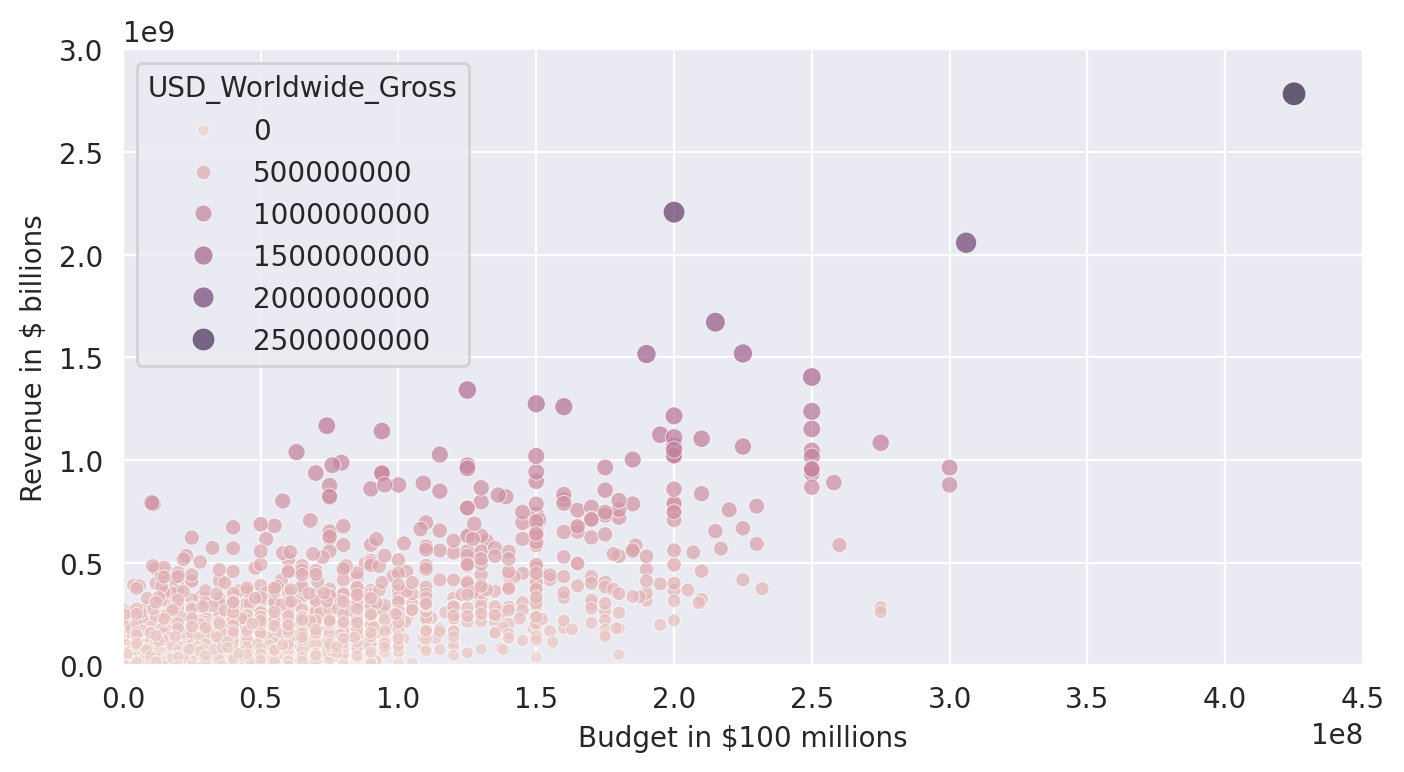

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,4) , dpi=200)
# Set the style of the plot
with sns.axes_style('darkgrid'):
    # Create the scatter plot with bubble size based on worldwide gross revenue
    axis1 = sns.scatterplot(data=New_dataframe, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue="USD_Worldwide_Gross",size='USD_Worldwide_Gross',  alpha=0.7)


    axis1.set(ylim=(0, 3000000000),
                xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')




### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>


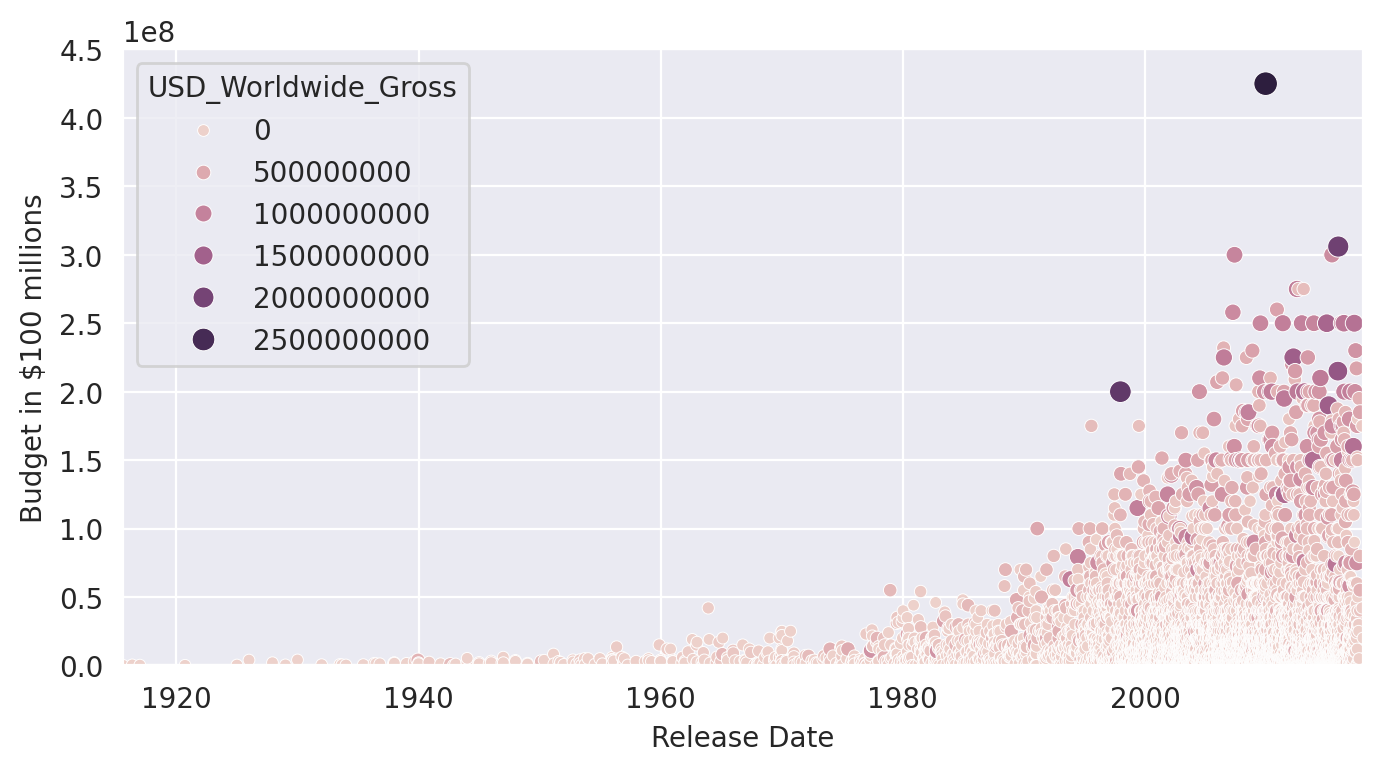

In [42]:
plt.figure(figsize=(8,4) , dpi=200)
# Set the style of the plot
with sns.axes_style('darkgrid'):
    # Create the scatter plot with bubble size based on worldwide gross revenue
    axis1 = sns.scatterplot(data=New_dataframe, x='Release_Date', y='USD_Production_Budget', hue="USD_Worldwide_Gross",size='USD_Worldwide_Gross')

    # Set the x-axis limit to the maximum data value
    axis1.set(
            xlim=(New_dataframe['Release_Date'].min(), New_dataframe['Release_Date'].max()),
              ylim=(0, 450000000),
              ylabel='Budget in $100 millions',
              xlabel='Release Date')


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:

1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
   <img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.


In [43]:
New_dataframe.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000
1,5140,1916-05-09,Intolerance,385907,0,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000


In [44]:
# Create a DatetimeIndex object from the Release_Date column
release_dates = pd.DatetimeIndex(New_dataframe['Release_Date'])

# Extract the year from the DatetimeIndex object
years = release_dates.year

# Convert the year data to the decades of the films
decades = (years // 10) * 10

# Add the decades as a Decade column to the New_dataframe DataFrame
New_dataframe['Decade'] = decades


C:\Users\Shri\AppData\Local\Temp\ipykernel_6908\1101795024.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataframe['Decade'] = decades


In [45]:
New_dataframe.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`

- `old_films` should include all the films before 1969 (up to and including 1969)
- `new_films` should include all the films from 1970 onwards
- How many films were released prior to 1970?
- What was the most expensive film made prior to 1970?


In [46]:
old_films = New_dataframe[New_dataframe['Decade'] <= 1969]
new_films = New_dataframe[New_dataframe['Decade'] >1969]
print(f"Number of films released before 1970: {len(old_films)}")
print(f"Number of films released after 1970: {len(new_films)}")
print(f"Most expensive film released before 1970: {old_films['Movie_Title'].loc[old_films['USD_Production_Budget'].idxmax()]}")

Number of films released before 1970: 153
Number of films released after 1970: 5231
Most expensive film released before 1970: Cleopatra


# Seaborn Regression Plots


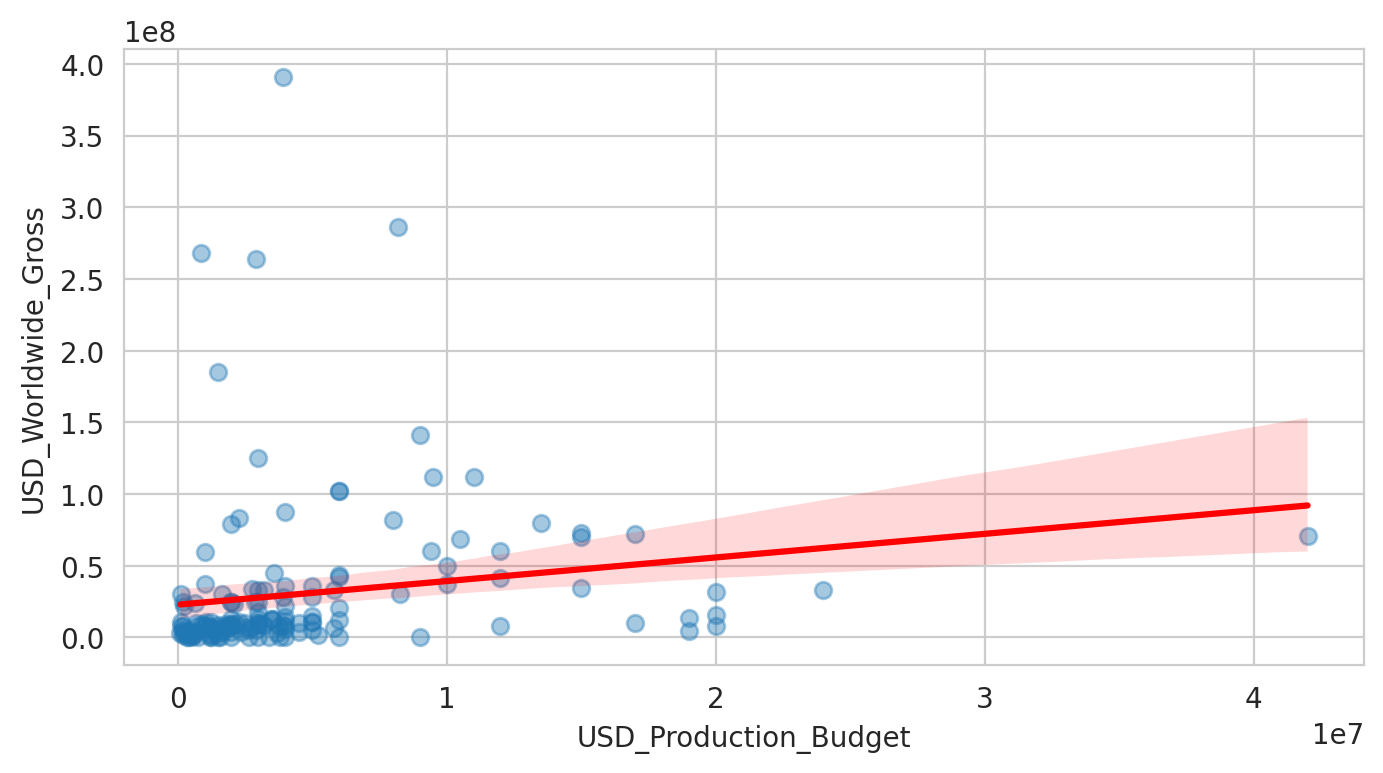

In [49]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'red'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

- Put the chart on a `'darkgrid'`.
- Set limits on the axes so that they don't show negative values.
- Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
- Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

- Do our data points for the new films align better or worse with the linear regression than for our older films?
- Roughly how much would a film with a budget of $150 million make according to the regression line?


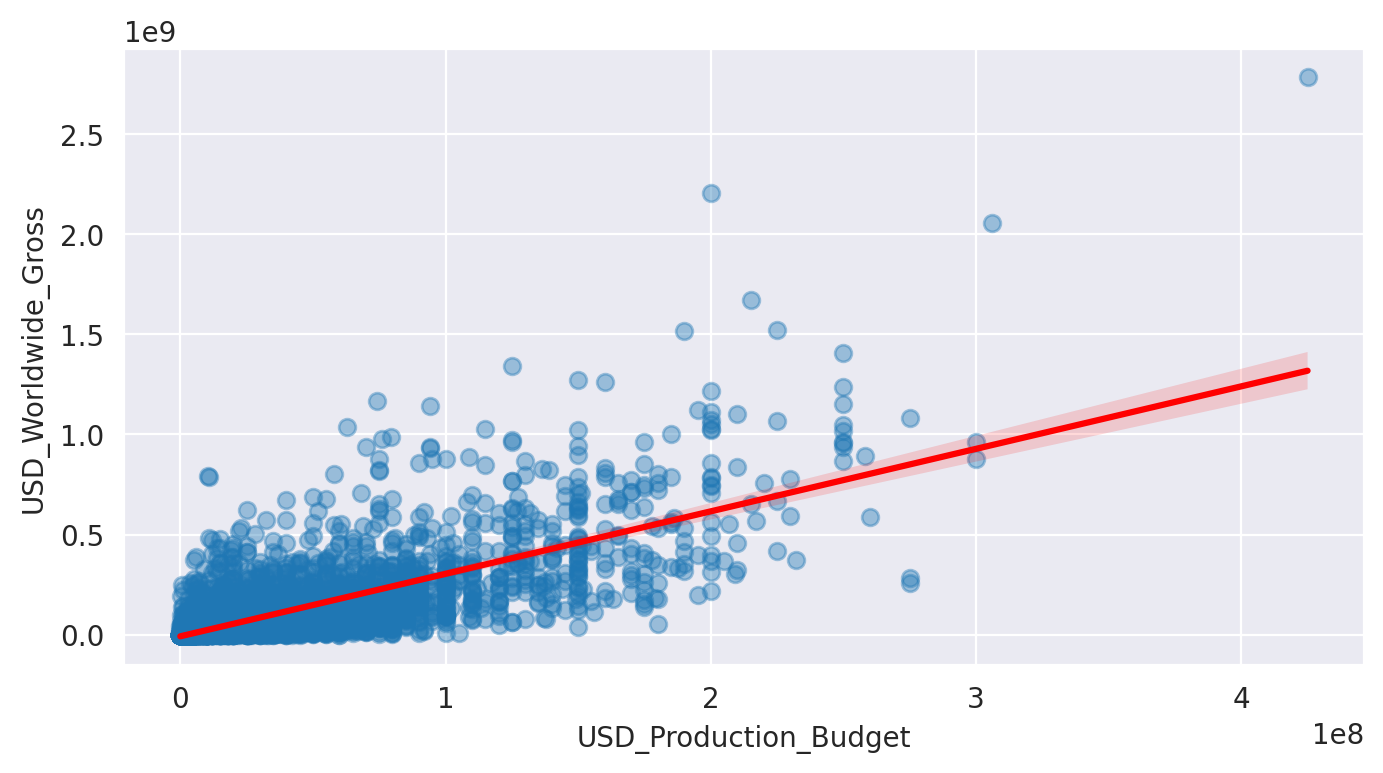

In [50]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'red'})

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta \_0 + \theta \_1 BUDGET$$


In [51]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?


In [77]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [78]:
# Find the best-fit line
regression.fit(X, y)
print(regression.intercept_ , regression.coef_)
regression.score(X, y)


[-8650768.00661042] [[3.12259592]]


0.5577032617720403

In [84]:
print(-8650768 + 3.12259592e+00 * 35000000)

100640089.2


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta \_0 + \theta \_1 BUDGET$$

**Challenge**: How much global revenue does our model estimate for a film with a budget of $350 million?


In [81]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [82]:
# Find the best-fit line
regression.fit(X, y)
print(regression.intercept_ , regression.coef_)
regression.score(X, y)


[22821538.63508039] [[1.64771314]]


0.02937258620576877